#**AIm: Adjust the threshold of the image and analyze the area of a specific component in the image.**

### **Overview**
This program will load an image, apply a threshold to create a binary image, find connected components, and analyze their areas. It also visualizes the results by drawing bounding boxes around each component.


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


 Analyzes the area of connected components in an image after applying a binary threshold.

Parameters:
- image_path (str): Path to the input image.
- threshold_value (int): Threshold value for binary conversion (0-255).

In [6]:
# Function to apply threshold and analyze component area in a Landsat image
def analyze_land_component_area(image_path, threshold_value):

    # Step 1: Load the image
    image = cv2.imread(image_path)  # Load the image
    if image is None:
        print("Error: Unable to load image. Please check the file path.")
        return

    # Convert the image to grayscale (if not already)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Apply binary thresholding
    # Pixels below the threshold will be set to 0 (black), and above the threshold will be set to 255 (white)
    _, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

    # Step 3: Analyze the connected components in the binary image
    # Connected components help in identifying separate regions (e.g., forested areas)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image)

    # Output the number of components (num_labels includes background)
    print(f"Number of components detected (including background): {num_labels}")

    # Convert the binary image to BGR for visualization purposes (to draw bounding boxes)
    colored_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)

    # Step 4: Calculate and display the area of each detected component (except background)
    total_area = 0
    for i in range(1, num_labels):  # Start from 1 to skip the background (label 0 is background)
        area = stats[i, cv2.CC_STAT_AREA]  # Get the area of the component
        total_area += area  # Add to total detected component area

        # Extract bounding box coordinates for the component
        x, y, w, h = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]

        # Draw a rectangle around the detected component
        cv2.rectangle(colored_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Label the component with its area at the center of the bounding box
        center_x, center_y = x + w // 2, y + h // 2
        cv2.putText(colored_image, f'Area: {area}', (center_x, center_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        print(f"Component {i} has an area of: {area} pixels")

    # Step 5: Display the total area of detected components
    print(f"Total area of detected components: {total_area} pixels")

    # Step 6: Show the original, binary, and processed images
    plt.figure(figsize=(10, 8))

    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for proper display in matplotlib
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Binary Image (Thresholded)')
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Detected Components with Bounding Boxes')
    plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

In [13]:
# Example Usage 1
image_path = r'/content/theshold.jpeg'  # Update with your image path
threshold_value = 127  # Define the threshold value (between 0 and 255)


Number of components detected (including background): 16
Component 1 has an area of: 901 pixels
Component 2 has an area of: 259 pixels
Component 3 has an area of: 531 pixels
Component 4 has an area of: 628 pixels
Component 5 has an area of: 792 pixels
Component 6 has an area of: 288 pixels
Component 7 has an area of: 549 pixels
Component 8 has an area of: 533 pixels
Component 9 has an area of: 358 pixels
Component 10 has an area of: 259 pixels
Component 11 has an area of: 688 pixels
Component 12 has an area of: 302 pixels
Component 13 has an area of: 507 pixels
Component 14 has an area of: 714 pixels
Component 15 has an area of: 1013 pixels
Total area of detected components: 8322 pixels


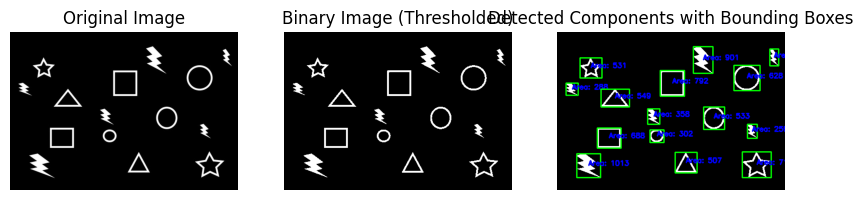

In [12]:
# Call the function to analyze the image
analyze_land_component_area(image_path, threshold_value)

In [15]:
#Example Usage 2
image_path = r'/content/terrain.jpg'  # Update with your image path
threshold_value = 100  # Define the threshold value (between 0 and 255)

Number of components detected (including background): 116
Component 1 has an area of: 34996 pixels
Component 2 has an area of: 1 pixels
Component 3 has an area of: 14 pixels
Component 4 has an area of: 1 pixels
Component 5 has an area of: 2 pixels
Component 6 has an area of: 1 pixels
Component 7 has an area of: 1 pixels
Component 8 has an area of: 3 pixels
Component 9 has an area of: 17 pixels
Component 10 has an area of: 1 pixels
Component 11 has an area of: 2 pixels
Component 12 has an area of: 1 pixels
Component 13 has an area of: 1 pixels
Component 14 has an area of: 1 pixels
Component 15 has an area of: 2 pixels
Component 16 has an area of: 3 pixels
Component 17 has an area of: 21 pixels
Component 18 has an area of: 4 pixels
Component 19 has an area of: 5 pixels
Component 20 has an area of: 1 pixels
Component 21 has an area of: 2 pixels
Component 22 has an area of: 6 pixels
Component 23 has an area of: 8 pixels
Component 24 has an area of: 5 pixels
Component 25 has an area of: 1 p

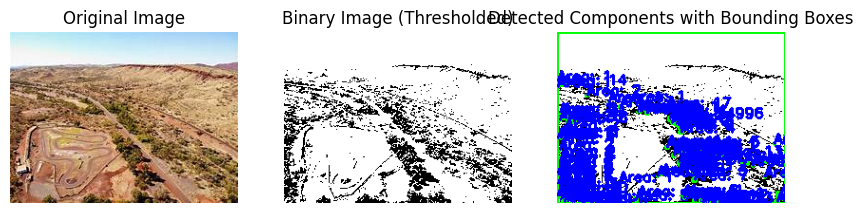

In [16]:
# Call the function to analyze the image
analyze_land_component_area(image_path, threshold_value)